In [ ]:
# chapter 8-1 はじめてのscikit-learn

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = lambda x: np.exp(3 * x)

In [3]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [4]:
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))

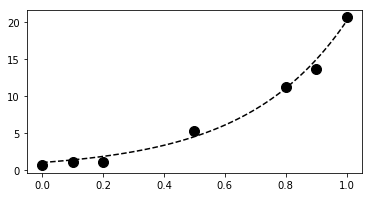

In [5]:
plt.figure(figsize=(6,3));
plt.plot(x_tr[:100], y_tr[:100], '--k');
plt.plot(x, y, 'ok', ms=10);

In [6]:
# モデルを作成
lr = lm.LinearRegression()
# 訓練データを使って学習を行う
lr.fit(x[:, np.newaxis], y)
# 学習済みモデルで予測を行う
y_lr = lr.predict(x_tr[:, np.newaxis])

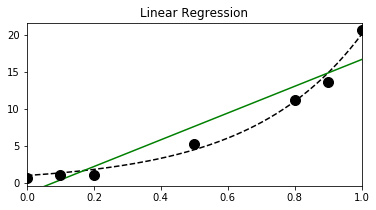

In [7]:
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_tr, y_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.xlim(0, 1);
plt.ylim(y.min()-1, y.max()+1);
plt.title("Linear Regression");

22.80 -4.73 0.00
405.74 -928.57 724.43 -201.40 19.81 0.00


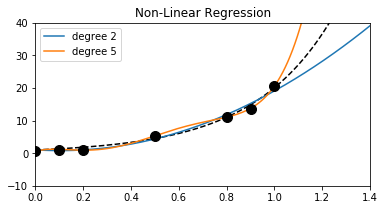

In [8]:
lrp = lm.LinearRegression()
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg in [2, 5]:
    lrp.fit(np.vander(x, deg + 1), y)
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_lrp, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.4);
    plt.ylim(-10, 40);
    # モデルの係数を表示
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10);
plt.title("Non-Linear Regression");

11.53 5.95 0.00
3.97 3.68 3.57 3.75 3.99 0.00


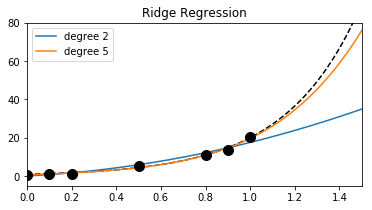

In [9]:
ridge = lm.RidgeCV()
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg in [2, 5]:
    ridge.fit(np.vander(x, deg + 1), y)
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_ridge, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.5);
    plt.ylim(-5, 80);
    # モデルの係数を表示
    print(' '.join(['%.2f' % c for c in ridge.coef_]))
plt.plot(x, y, 'ok', ms=10);
plt.title("Ridge Regression");

In [ ]:
# chapter 8-2 ロジスティック回帰を使った、タイタニック生存者の予測

In [10]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Really_HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Really_HP\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [11]:
train = pd.read_csv('data/titanic_train.csv')
test = pd.read_csv('data/titanic_test.csv')

In [12]:
train[train.columns[[2,4,5,1]]].head()

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [13]:
data = train[['Sex', 'Age', 'Pclass', 'Survived']].copy()
data['Sex'] = data['Sex'] == 'female'
data = data.dropna()

In [14]:
data_np = data.astype(np.int32).values
X = data_np[:,:-1]
y = data_np[:,-1]

In [15]:
# 論理配列をいくつか定義する
female = X[:,0] == 1
survived = y == 1
# この配列は乗客の年齢を格納する
age = X[:,1]
# ヒストグラムを作成
bins_ = np.arange(0, 81, 5)
S = {'male': np.histogram(age[survived & ~female], bins=bins_)[0],
    'female': np.histogram(age[survived & female], bins=bins_)[0]}
D = {'male': np.histogram(age[~survived & ~female], bins=bins_)[0],
    'female': np.histogram(age[~survived & female], bins=bins_)[0]}

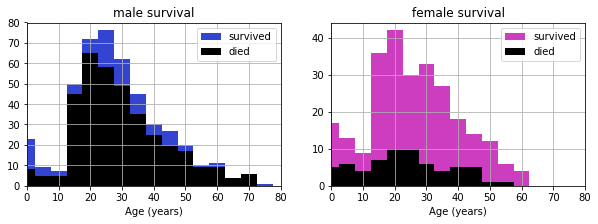

In [16]:
# データの表示
bins = bins_[:-1]
plt.figure(figsize=(10,3));
for i, sex, color in zip((0, 1), ('male', 'female'), ('#3345d0', '#cc3dc0')):
    plt.subplot(121 + i);
    plt.bar(bins, S[sex], bottom=D[sex], color=color, width=5, label='survived');
    plt.bar(bins, D[sex], color='k', width=5, label='died');
    plt.xlim(0, 80);
    plt.grid(None);
    plt.title(sex + " survival");
    plt.xlabel("Age (years)");
    plt.legend()

In [37]:
# Xとyを訓練用とテスト用に分割する
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=0.5)

In [38]:
# 分類器をインスタンス化する
logreg = lm.LogisticRegression()

In [39]:
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)

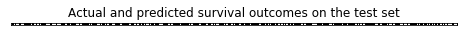

In [40]:
plt.figure(figsize=(8, 3));
plt.imshow(np.vstack((y_test, y_predicted)), interpolation='none', cmap='bone');
plt.xticks([]); plt.yticks([]);
plt.title(("Actual and predicted survival outcomes on the test set"));

In [41]:
cv.cross_val_score(logreg, X, y)

array([ 0.78661088,  0.78991597,  0.78059072])

In [42]:
grid = gs.GridSearchCV(logreg, {'C': np.logspace(-5, 5, 50)})
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.1206792640639329}

In [43]:
cv.cross_val_score(grid.best_estimator_, X, y)

array([ 0.79916318,  0.79411765,  0.77637131])

In [ ]:
# chapter 8-3 K近傍分類器を用いた手書き数字認識の学習